In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from tqdm import tqdm
from nltk.tokenize import word_tokenize,sent_tokenize
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

In [2]:
train_data = pd.read_csv('train.csv',delimiter='~')# Main data frame
test_data = pd.read_csv('test.csv',delimiter='~')
train = train_data                                 #Temporary Data frame and we are going to use these
test = test_data

# Preprocessing code

# In train data

In [3]:
train.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,11755,After reading mixed reviews I almost didn't bo...,Google Chrome,Desktop,Good
1,33912,This motor inn is located about - city blocks ...,Firefox,Tablet,Good
2,10143,It was our first time there and surely not our...,Google Chrome,Mobile,Good
3,33114,"Great hotel in an excellent location, just off...",Mozilla,Desktop,Good
4,17464,We stayed at the hotel for - weeks to get away...,Google Chrome,Desktop,Good


In [4]:
train.isnull().any()

User_ID         False
Description     False
Browser_Used    False
Device_Used     False
Is_Response     False
dtype: bool

In [5]:
train.shape

(30172, 5)

In [6]:
train.columns

Index(['User_ID', 'Description', 'Browser_Used', 'Device_Used', 'Is_Response'], dtype='object')

In [7]:
train['Browser_Used'].unique()

array(['Google Chrome', 'Firefox', 'Mozilla', 'InternetExplorer', 'Edge',
       'Mozilla Firefox', 'Internet Explorer', 'Chrome', 'IE', 'Opera',
       'Safari'], dtype=object)

In [8]:
Browser_Used=[] 
for i in train['Browser_Used']:
    if i ==('Chrome'):
        Browser_Used.append('Google Chrome')
    elif (i=='Firefox' or i=='Mozilla'):
        Browser_Used.append('Mozilla Firefox')
    elif (i=='InternetExplorer'or i=='IE'):
        Browser_Used.append('Internet Explorer')
    else:
       Browser_Used.append(i)  

In [9]:
train['Browser_Used'] = Browser_Used

In [10]:
train['Browser_Used'].unique()

array(['Google Chrome', 'Mozilla Firefox', 'Internet Explorer', 'Edge',
       'Opera', 'Safari'], dtype=object)

In [11]:
train['Device_Used'].unique()

array(['Desktop', 'Tablet', 'Mobile'], dtype=object)

In [12]:
train['Is_Response'].unique()

array(['Good', 'Bad'], dtype=object)

In [13]:
mapping = {'Good':0,'Bad':1}
Is_Response = train['Is_Response'].map(mapping)

In [14]:
Description = list(train['Description'])
Browser_Used = list(train['Browser_Used'])
Device_Used = list(train['Device_Used'])

In [15]:
def clean(holdtext):
    dataset=[]
    for i in tqdm(holdtext):        
        sent_tokenize_list = sent_tokenize(i)
        tokenized_reports = [word_tokenize(report) for report in sent_tokenize_list]
        regex = re.compile('[%s]' % re.escape(string.punctuation))
        tokenized_reports_no_punctuation = []
        
        for review in tokenized_reports:
            new_review = []
            for token in review: 
                new_token = regex.sub(u'', token)
                if not new_token == u'':
                    new_review.append(new_token)
            tokenized_reports_no_punctuation.append(new_review)    
        tokenized_reports_no_stopwords = []
        for report in tokenized_reports_no_punctuation:
            new_term_vector = []
            for word in report:
                if not word in stopwords.words('english'):
                    new_term_vector.append(word)
            tokenized_reports_no_stopwords.append(new_term_vector)
        v=[]
        for i in tokenized_reports_no_stopwords:
            v.append(" ".join(i))
        gt=" ".join(v)
        text2=''.join([i for i in gt if not i.isdigit()])
        toker = RegexpTokenizer(r'((?<=[^\w\s])\w(?=[^\w\s])|(\W))+', gaps=True)
        fnlTxt=''.join(toker.tokenize(text2))
        dataset.append(" ".join(fnlTxt.split()))
    return dataset

In [16]:
Description,Browser_Used,Device_Used = clean(Description),clean(Browser_Used),clean(Device_Used)

100%|██████████| 30172/30172 [00:17<00:00, 1729.36it/s]


In [17]:
c1 = pd.DataFrame(Description,columns=['Description'])
c2 = pd.DataFrame(Browser_Used,columns=['Browser_Used'])
c3 = pd.DataFrame(Device_Used,columns=['Device_Used'])
c4 = Is_Response

In [18]:
c1.reset_index(drop=True,inplace=True)
c2.reset_index(drop=True,inplace=True)
c3.reset_index(drop=True,inplace=True)
c4.reset_index(drop=True,inplace=True)

In [19]:
train_df = pd.concat([c1,c2,c3,c4],axis=1)

In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30172 entries, 0 to 30171
Data columns (total 4 columns):
Description     30172 non-null object
Browser_Used    30172 non-null object
Device_Used     30172 non-null object
Is_Response     30172 non-null int64
dtypes: int64(1), object(3)
memory usage: 943.0+ KB


In [21]:
train_data = train_df.drop('Is_Response',axis=1)
train_data.head()

,Description,Browser_Used,Device_Used
0,After reading mixed reviews I almost nt book W...,Google Chrome,Desktop
1,This motor inn located city blocks Fisherman W...,Mozilla Firefox,Tablet
2,It first time surely last Arrived early train ...,Google Chrome,Mobile
3,Great hotel excellent location Times Square ne...,Mozilla Firefox,Desktop
4,We stayed hotel weeks get away long Massachuse...,Google Chrome,Desktop


In [22]:
train_array = np.array(train_data)

In [23]:
hold_train = []
for i in range(len(train_array)):
    hold_train.append(" ".join(train_array[i]))

In [24]:
vect_train = CountVectorizer(max_features=3000)
vect_train.fit(hold_train)
simple_train_dtm = vect_train.transform(hold_train)
std_train   =  simple_train_dtm.toarray()

# In test data

In [25]:
test.head()

,User_ID,Description,Browser_Used,Device_Used
0,9602,A friend and I stayed in this hotel when we we...,Edge,Desktop
1,8749,I enjoy staying here when I have early flights...,Google Chrome,Mobile
2,15500,I stopped off in Seattle during a train tour o...,Chrome,Mobile
3,5495,I have stayed at this hotel - or - times now f...,Mozilla Firefox,Desktop
4,18570,Excellent location with hop on hop off city tr...,Edge,Mobile


In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 4 columns):
User_ID         8760 non-null int64
Description     8760 non-null object
Browser_Used    8760 non-null object
Device_Used     8760 non-null object
dtypes: int64(1), object(3)
memory usage: 273.8+ KB


In [27]:
test.columns

Index(['User_ID', 'Description', 'Browser_Used', 'Device_Used'], dtype='object')

In [28]:
test['Browser_Used'].unique()

array(['Edge', 'Google Chrome', 'Chrome', 'Mozilla Firefox', 'IE',
       'Firefox', 'Opera', 'InternetExplorer', 'Mozilla',
       'Internet Explorer', 'Safari'], dtype=object)

In [29]:
Browser_Used=[]
for i in test['Browser_Used']:
    if i ==('Chrome'):
        Browser_Used.append('Google Chrome')
    elif (i=='Firefox' or i=='Mozilla'):
        Browser_Used.append('Mozilla Firefox')
    elif (i=='InternetExplorer'or i=='IE'):
        Browser_Used.append('Internet Explorer')
    else:
       Browser_Used.append(i) 

In [30]:
test['Browser_Used'] = Browser_Used

In [31]:
test['Browser_Used'].unique()

array(['Edge', 'Google Chrome', 'Mozilla Firefox', 'Internet Explorer',
       'Opera', 'Safari'], dtype=object)

In [32]:
test['Device_Used'].unique()

array(['Desktop', 'Mobile', 'Tablet'], dtype=object)

In [33]:
Description = list(test['Description'])
Browser_Used = list(test['Browser_Used'])
Device_Used = list(test['Device_Used'])

In [34]:
#hear i am calling clean function that i have declare in traing data part
Description,Browser_Used,Device_Used = clean(Description),clean(Browser_Used),clean(Device_Used)

100%|██████████| 8760/8760 [00:04<00:00, 1864.37it/s]


In [35]:
c1 = test['User_ID']
c2 = pd.DataFrame(Description,columns=['Description'])
c3 = pd.DataFrame(Browser_Used,columns=['Browser_Used'])
c4 = pd.DataFrame(Device_Used,columns=['Device_Used'])

In [36]:
c1.reset_index(drop=True,inplace=True)
c2.reset_index(drop=True,inplace=True)
c3.reset_index(drop=True,inplace=True)
c4.reset_index(drop=True,inplace=True)

In [37]:
test_df = pd.concat([c1,c2,c3,c4],axis=1)

In [38]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 4 columns):
User_ID         8760 non-null int64
Description     8760 non-null object
Browser_Used    8760 non-null object
Device_Used     8760 non-null object
dtypes: int64(1), object(3)
memory usage: 273.8+ KB


In [39]:
test_data = test_df.drop('User_ID',axis=1)
test_data.head()

,Description,Browser_Used,Device_Used
0,A friend I stayed hotel Jacksonville concert I...,Edge,Desktop
1,I enjoy staying I early flights Service good c...,Google Chrome,Mobile
2,I stopped Seattle train tour west great experi...,Google Chrome,Mobile
3,I stayed hotel times business travel plan week...,Mozilla Firefox,Desktop
4,Excellent location hop hop city transport stop...,Edge,Mobile


In [40]:
test_array = np.array(test_data)

In [41]:
hold_test = []
for i in range(len(test_array)):
    hold_test.append(" ".join(test_array[i]))

In [42]:
vect_test = CountVectorizer(max_features=3000)
vect_test.fit(hold_test)
simple_test_dtm = vect_test.transform(hold_test)
std_test   =  simple_test_dtm.toarray()

# Model traning code

# Data spliting

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(std_train,train_df['Is_Response'], test_size=0.33, random_state=4)

# Machine Learning Model

# (1.)xgboost

In [45]:
import xgboost as xgb

In [46]:
model_xgboost = xgb.XGBClassifier() # boosted tree classifire

In [47]:
model_xgboost.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [49]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 

In [50]:
xgboost_pred = model_xgboost.predict(X_test)
print(accuracy_score(xgboost_pred,y_test))

/home/omraj/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8357939138294667


In [51]:
confusion_matrix(y_test,xgboost_pred)

array([[6375,  359],
       [1276, 1947]])

# (2.)SVM

In [52]:
from sklearn import svm

In [53]:
svm_model = svm.SVC()

In [54]:
svm_model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [55]:
svm_pred= svm_model.predict(X_test)

In [56]:
print(accuracy_score(svm_pred,y_test))

0.847644872953701


In [57]:
confusion_matrix(y_test,svm_pred)

array([[6500,  234],
       [1283, 1940]])

# (3.)Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression

# Model tuning

In [59]:
LRmodel = LogisticRegression()######default C=1#####

In [60]:
LRmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [84]:
print("training set score: %f" % LRmodel.score(X_train, y_train))
print('\n'"test set score: %f" % LRmodel.score(X_test, y_test))

training set score: 0.941182

test set score: 0.870242


In [87]:
######increase C to 100#####
LRmodel100=LogisticRegression(C=100)

In [88]:
LRmodel100.fit(X_train,y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [89]:
print('\n'"training set score of lgr100: %f" % LRmodel100.score(X_train, y_train))
print('\n'"test set score of lgr100: %f" % LRmodel100.score(X_test, y_test))


training set score of lgr100: 0.948108

test set score of lgr100: 0.849553


In [90]:
######increase C to 0.01#####
LRmodel001=LogisticRegression(C=0.01)

In [91]:
LRmodel001.fit(X_train,y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [92]:
print('\n'"training set score of lgr001: %f" % LRmodel001.score(X_train, y_train))
print('\n'"test set score of lgr001: %f" % LRmodel001.score(X_test, y_test))


training set score of lgr001: 0.900816

test set score of lgr001: 0.878277


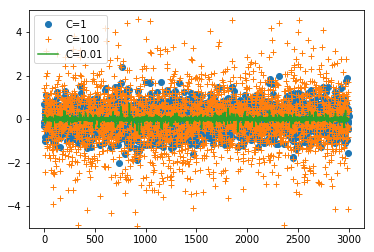

In [99]:
import matplotlib.pyplot as plt
plt.plot(LRmodel.coef_.T,'o',label='C=1')
plt.plot(LRmodel100.coef_.T,'+',label='C=100')
plt.plot(LRmodel001.coef_.T,'-',label='C=0.01')
#plt.xticks(range(train_df.shape[1]),train_df.feature_names,rotation=90)
plt.ylim(-5,5)
plt.legend()
plt.show()

In [100]:
print('Coefficient: \n',LRmodel100.coef_)
print('Intercept: \n',LRmodel100.intercept_)

Coefficient: 
 [[ 1.41727795 -0.08776021  0.2658561  ...  1.24775215 -4.11860988
   0.36904854]]
Intercept: 
 [-1.53682593]


In [103]:
LR_pred= LRmodel001.predict(X_test)

In [104]:
print(accuracy_score(LR_pred,y_test))

0.8782765893341368


In [64]:
confusion_matrix(y_test,LR_pred)

array([[6186,  548],
       [ 744, 2479]])

# Model saving

In [ ]:
# consider Logistic Regression 

In [66]:
import pickle

In [67]:
# save the model to disk using Logistic Regression model
filename = 'review_model_LR.sav'
pickle.dump(LRmodel, open(filename, 'wb'))

# Model Prediction code on test Data

In [68]:
# load the model from disk and predict
z_train = std_test
test_pred = LRmodel.predict(z_train)
print(test_pred)

[1 0 0 ... 1 1 1]


In [82]:
predict_test = pd.DataFrame(test_pred,columns=['Prediction'])

In [70]:
predict_test.reset_index(drop=True,inplace=True)

In [71]:
predict_test['Prediction'].head()

0    1
1    0
2    0
3    0
4    0
Name: Prediction, dtype: int64

In [72]:
predict_test['Prediction'].unique()

array([1, 0])

In [73]:
mapping = {0:'Good',1:'Bad'}
Is_Response = predict_test['Prediction'].map(mapping)

In [74]:
Is_Response.head()

0     Bad
1    Good
2    Good
3    Good
4    Good
Name: Prediction, dtype: object

#  putting the submission score 

In [75]:
sample_submission = pd.read_csv('sample_submission.csv',delimiter='~')

In [76]:
sample_submission.head()

,User_ID,Is_Response
0,9602,NaN
1,8749,NaN
2,15500,NaN
3,5495,NaN
4,18570,NaN


In [77]:
sample_submission['Is_Response'] = Is_Response

In [78]:
sample_submission.head()

,User_ID,Is_Response
0,9602,Bad
1,8749,Good
2,15500,Good
3,5495,Good
4,18570,Good


In [79]:
#save csv in disk
sample_submission.to_csv('sample_submission_omraj.csv',sep='~',index=False)#separating column with Tlide(~)

In [80]:
temp = pd.read_csv('sample_submission_omraj.csv')

In [83]:
temp.head()

,User_ID~Is_Response
0,9602~Bad
1,8749~Good
2,15500~Good
3,5495~Good
4,18570~Good
